## In this Notebook

### 1. Import Libraries
### 2. Import Data
### 3. Clean Data
### 4. Explore Data (Visually)
### 5. State Hypothesis
### 6. Reshape Variables into NumPy Arrays
### 7. Split the Data into Two Sets: Train and Test
### 8. Run a Linear Regression on the Data
### 9. Plot Regression Line on Test Set
### 10. Interpret Fit of Regression Line on Test Set
### 11. Check Model Performance Statistics - R2 and MSE
### 12. Thoughts and Reflections on Performance of Model and possible Data Bias

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### 2. Import Data

In [3]:
# Set Path

path = r'C:\Users\Josh Wattay\anaconda3\Flight Delay Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Clean Data', 'Flights_Clean.csv'))

In [5]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [6]:
df.head(20)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-12-02,Comair Inc.,DCA,BTV,False,False,1459,1533.0,34.0,34.0,...,1554.0,1655.0,2.0,1631,26.0,1.0,1.0,1600-1659,2,0.0
1,2018-06-30,Spirit Air Lines,ATL,LAS,False,False,1810,1833.0,23.0,23.0,...,1850.0,1951.0,4.0,1920,35.0,1.0,2.0,1900-1959,7,0.0
2,2018-02-11,Frontier Airlines Inc.,MCI,RSW,False,False,1234,1241.0,7.0,7.0,...,1249.0,1620.0,22.0,1619,23.0,1.0,1.0,1600-1659,5,0.0
3,2018-06-22,United Air Lines Inc.,DEN,CID,False,False,2017,2156.0,99.0,99.0,...,2211.0,33.0,4.0,2303,94.0,1.0,6.0,2300-2359,3,0.0
4,2018-10-19,SkyWest Airlines Inc.,BGM,DTW,False,False,1728,1725.0,0.0,-3.0,...,1733.0,1846.0,7.0,1904,-11.0,0.0,-1.0,1900-1959,2,0.0
5,2018-08-07,United Air Lines Inc.,SFO,ATL,False,False,1040,1048.0,8.0,8.0,...,1119.0,1836.0,6.0,1835,7.0,0.0,0.0,1800-1859,9,0.0
6,2018-12-01,Mesa Airlines Inc.,MAF,DFW,False,False,1234,1404.0,90.0,90.0,...,1420.0,1503.0,8.0,1348,83.0,1.0,5.0,1300-1359,2,0.0
7,2018-01-02,SkyWest Airlines Inc.,GEG,SFO,False,False,555,550.0,0.0,-5.0,...,614.0,802.0,6.0,815,-7.0,0.0,-1.0,0800-0859,3,0.0
8,2018-11-25,Mesa Airlines Inc.,MFE,DFW,False,False,1104,1102.0,0.0,-2.0,...,1131.0,1234.0,8.0,1240,2.0,0.0,0.0,1200-1259,2,0.0
9,2018-11-04,Delta Air Lines Inc.,ATL,CLE,False,False,821,818.0,0.0,-3.0,...,825.0,941.0,3.0,959,-15.0,0.0,-1.0,0900-0959,3,0.0


In [7]:
df.shape

(500000, 61)

In [8]:
# Check for Missing Values

df.isnull().sum()

FlightDate                0
Airline                   0
Origin                    0
Dest                      0
Cancelled                 0
                      ...  
ArrDel15              15443
ArrivalDelayGroups    15443
ArrTimeBlk                0
DistanceGroup             0
DivAirportLandings        3
Length: 61, dtype: int64

In [9]:
# As previously discovered in 6.2, these values will not be cleaned as they represent cancelled flights in the ArrDel15 and ArrivalDelayGroups columns

In [10]:
# Check for Duplicates

dups = df.duplicated()

In [11]:
dups.shape

(500000,)

In [12]:
# No Duplicates!

C:\Users\Josh Wattay\AppData\Local\Temp\ipykernel_13352\1687746636.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DepDelayMinutes'], bins=25)
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DepDelayMinutes', ylabel='Density'>

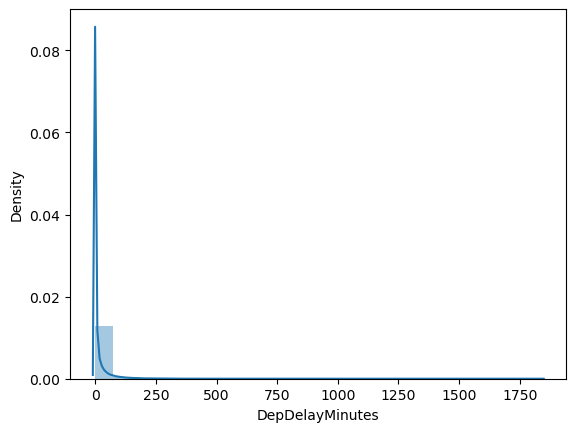

In [13]:
# Check for Extreme Values

sns.distplot(df['DepDelayMinutes'], bins=25)

In [14]:
# There are some extreme values that will need to be addressed for the Linear Regression

In [15]:
# Check the Mean

df['DepDelayMinutes'].mean()

12.62784337612202

In [16]:
# Check the Median

df['DepDelayMinutes'].median()

0.0

In [17]:
# Check the Max

df['DepDelayMinutes'].max()

1839.0

C:\Users\Josh Wattay\AppData\Local\Temp\ipykernel_13352\4219957479.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outliers['DepDelayMinutes'], bins=25)
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


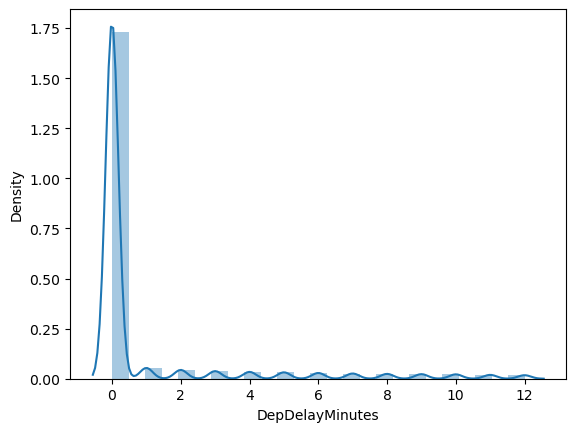

In [18]:
# Handle Outliers using the IQR Method

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['DepDelayMinutes'].quantile(0.25)
Q3 = df['DepDelayMinutes'].quantile(0.75)

# Step 2: Calculate the IQR
IQR = Q3 - Q1

# Step 3: Define the acceptable range (excluding outliers)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter out the outliers
df_no_outliers = df[(df['DepDelayMinutes'] >= lower_bound) & (df['DepDelayMinutes'] <= upper_bound)]

# Step 5: Plot the distribution without outliers to verify
sns.distplot(df_no_outliers['DepDelayMinutes'], bins=25)
plt.show()

In [19]:
# As you can see, this distribution is much better now that the outliers have been addressed.

### 4. Explore Data Visually

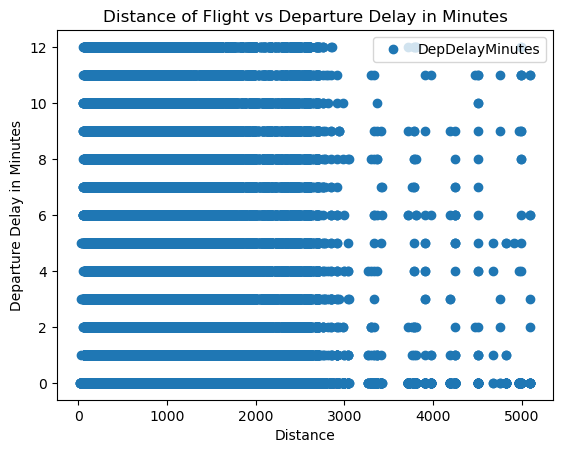

In [20]:
# Prepare Data for Analysis

# Create a scatterplot using matplotlib 

df_no_outliers.plot(x = 'Distance', y='DepDelayMinutes',style='o')
plt.title('Distance of Flight vs Departure Delay in Minutes')  
plt.xlabel('Distance')  
plt.ylabel('Departure Delay in Minutes')  
plt.show()

### 5. State Hypothesis

#### The shorter the distance of the flight, the more likely that flight will be delayed.

### 6. Reshape Variables into NumPy Arrays

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_no_outliers['Distance'].values.reshape(-1,1)
y = df_no_outliers['DepDelayMinutes'].values.reshape(-1,1)

In [22]:
X

array([[1155.],
       [ 378.],
       [2139.],
       ...,
       [ 547.],
       [1179.],
       [ 794.]])

In [23]:
y

array([[7.],
       [0.],
       [8.],
       ...,
       [0.],
       [0.],
       [0.]])

### 7. Split the Data into Two Sets: Train and Test

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Run a Linear Regression on the Data

In [25]:
# Create a regression object.

regression = LinearRegression()

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

### 9. Plot Regression Line on a Test Set

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

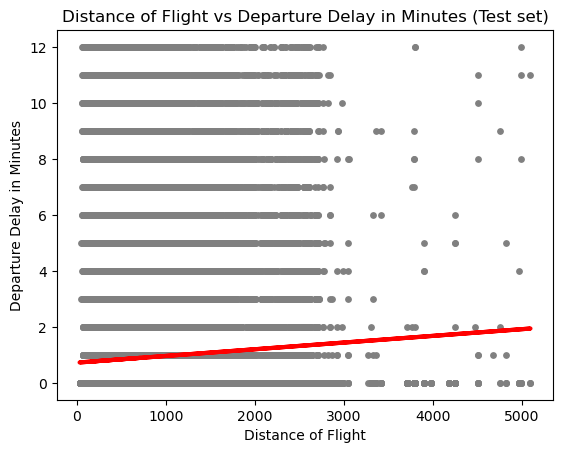

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance of Flight vs Departure Delay in Minutes (Test set)')
plot_test.xlabel('Distance of Flight')
plot_test.ylabel('Departure Delay in Minutes')
plot_test.show()

### 10. Interpret Fit of Regression Line on Test Set

#### This is fascinating because I anticipated the regression line to demonstrate a negative correlation, with Departure Delay in Minutes decreasing when the Distance of Flight increases. The result appears to in fact demonstrate the exact opposite, with an ever so slight positive correlation, demonstrating that as Distance increases, so too does the Departure Delay in minutes.

### 11. Check Model Performance Statistics - R2 and MSE

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics in order to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00023911]]
Mean squared error:  5.927246721088491
R2 score:  0.003869527305522813


### 12. Thoughts and Reflections on Performance of Model and possible Data Bias

#### I believe the model performed horribly given the R2 score (nearly pure 0) and the MSE of just 5.92. I think the correlation between the variables, once the outliers were removed using the IQR method, negatively impacted the model, because the relationship was at that point in time hardly linear, given the visual of the scatterplot that resulted from the df_no_outliers dataframe. With such a lack of linear relationship between the x and y variables, the model seemingly had no ability to accuratly determine or predict dependent variable results. 

#### There is certainly a potential for data bias in this model because flights experiencing delays greater than 12 mintues are not even being considered. Additionally, it is important to keep in mind that this data includes a value of 0 for flights that are not delayed, which (THANKFULLY) is the vast majority of domestic flights in the United States. Therefore, there is a significant negative skew of the DepDelayMinutes column with most values being 0. In fact, I will run this model again using the dataframe that includes outliers and I will start by conducting a value counts of the DepDelayMinutes column to demonstrate the sheer volume of flights with no delays.

In [31]:
# Value Counts of DepDelayMinutes column

df['DepDelayMinutes'].value_counts()

DepDelayMinutes
0.0       329442
1.0         9957
2.0         8121
3.0         7016
4.0         6304
           ...  
744.0          1
444.0          1
506.0          1
459.0          1
1157.0         1
Name: count, Length: 912, dtype: int64

In [32]:
# Out of 500000 records/flights; 329442 had a delay of 0 minutes

329442/500000

0.658884

In [33]:
#65% of flights or 2/3rds are not delayed! Creating a significant skew (bias) in the data

In [34]:
# For this reanalysis, I will now remove values of 0 from the dataframe used for the model, because my hypothesis is testing flights that are delayed.
# Therefore I don't care about flights that are not delayed and they are biasing my results. 
# I only care about analyzing and testing my hypothesis on flights that were delayed and how distance relates to delayed flights.

C:\Users\Josh Wattay\AppData\Local\Temp\ipykernel_13352\3949290041.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_zero_delay['DepDelayMinutes'], bins=25)
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


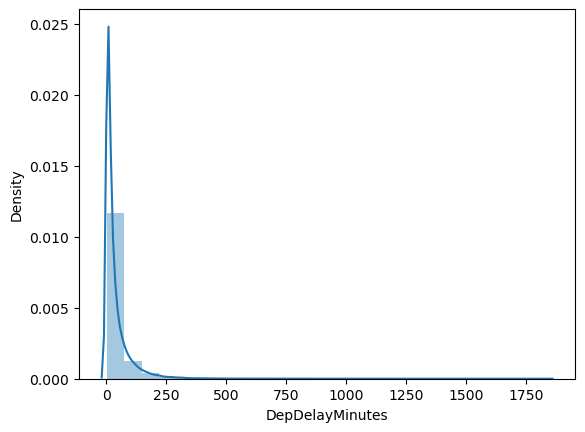

   FlightDate                 Airline Origin Dest  Cancelled  Diverted  \
0  2018-12-02             Comair Inc.    DCA  BTV      False     False   
1  2018-06-30        Spirit Air Lines    ATL  LAS      False     False   
2  2018-02-11  Frontier Airlines Inc.    MCI  RSW      False     False   
3  2018-06-22   United Air Lines Inc.    DEN  CID      False     False   
5  2018-08-07   United Air Lines Inc.    SFO  ATL      False     False   

   CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ...  WheelsOff  WheelsOn  \
0        1459   1533.0             34.0      34.0  ...     1554.0    1655.0   
1        1810   1833.0             23.0      23.0  ...     1850.0    1951.0   
2        1234   1241.0              7.0       7.0  ...     1249.0    1620.0   
3        2017   2156.0             99.0      99.0  ...     2211.0      33.0   
5        1040   1048.0              8.0       8.0  ...     1119.0    1836.0   

   TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  ArrTimeBlk  \
0  

In [35]:
# Step 1: Filter out records where DepDelayMinutes is 0
df_no_zero_delay = df[df['DepDelayMinutes'] != 0]

# Step 2: Plot the distribution to verify
sns.distplot(df_no_zero_delay['DepDelayMinutes'], bins=25)
plt.show()

# Display the new DataFrame
print(df_no_zero_delay.head())

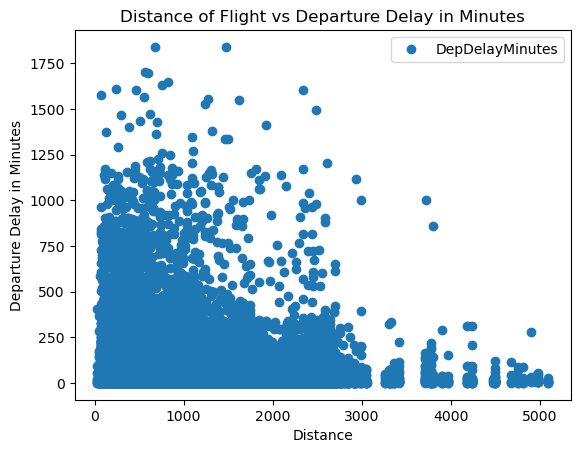

In [36]:
# Prepare Data for Analysis

# Create a scatterplot using matplotlib 

df_no_zero_delay.plot(x = 'Distance', y='DepDelayMinutes',style='o')
plt.title('Distance of Flight vs Departure Delay in Minutes')  
plt.xlabel('Distance')  
plt.ylabel('Departure Delay in Minutes')  
plt.show()

In [37]:
# Already significantly more Linear - Not perfect, but much better.

#### Hypothesis: The shorter the distance of the flight, the more likely that flight will be delayed.

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_no_zero_delay['Distance'].values.reshape(-1,1)
y = df_no_zero_delay['DepDelayMinutes'].values.reshape(-1,1)

In [39]:
X

array([[ 437.],
       [1747.],
       [1155.],
       ...,
       [ 844.],
       [ 589.],
       [1553.]])

In [40]:
y

array([[34.],
       [23.],
       [ 7.],
       ...,
       [30.],
       [ 1.],
       [16.]])

In [44]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
# I need to address the NaN values in y_train before I proceed

In [47]:
# Define features and target
X = df_no_zero_delay[['Distance']]
y = df_no_zero_delay['DepDelayMinutes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Check for NaN values in y_train
print("Number of NaN values in y_train:", np.sum(np.isnan(y_train)))

# Remove rows with NaN values in y_train
not_nan_indices = ~np.isnan(y_train)
X_train_clean = X_train[not_nan_indices]
y_train_clean = y_train[not_nan_indices]

# Initialize the regression model
regression = LinearRegression()

# Fit the regression model on the cleaned dataset
regression.fit(X_train_clean, y_train_clean)

# Print model coefficients
print("Model coefficients:", regression.coef_)

Number of NaN values in y_train: 9782
Model coefficients: [-0.00390575]


In [48]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

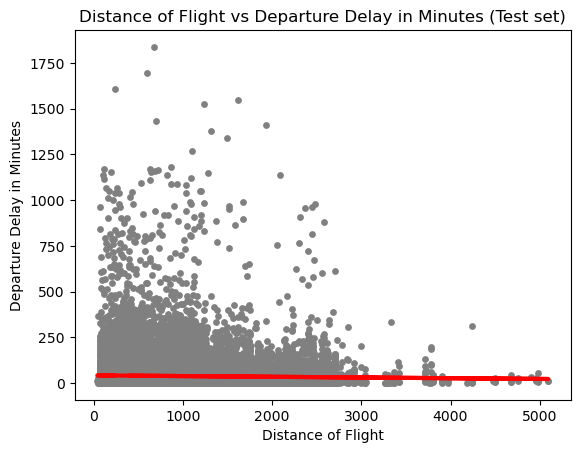

In [49]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance of Flight vs Departure Delay in Minutes (Test set)')
plot_test.xlabel('Distance of Flight')
plot_test.ylabel('Departure Delay in Minutes')
plot_test.show()

#### This is what I expected from the model, an ever so slight negative correlation, as distance increases, departure delay in minutes decreases. I do believe that the volume of short distance (less than 1000 mile flights) may be biasing the data here, but for the time being, this model is performing more in line with my expectations than the previous model that removed outliers. 

#### I will now check its performance based on the statistics of R2 and MSE.

In [51]:
# Print the model summary statistics in order to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-0.00390575]
Mean squared error:  5.927246721088491
R2 score:  0.003869527305522813


In [53]:
# Check for NaN values in y_test and y_predicted
print("Number of NaN values in y_test:", np.sum(np.isnan(y_test)))
print("Number of NaN values in y_predicted:", np.sum(np.isnan(y_predicted)))

# Remove rows with NaN values in y_test and y_predicted
not_nan_indices_test = ~np.isnan(y_test) & ~np.isnan(y_predicted)
y_test_clean = y_test[not_nan_indices_test]
y_predicted_clean = y_predicted[not_nan_indices_test]

# Calculate RMSE and R2 score on the cleaned data
rmse = mean_squared_error(y_test_clean, y_predicted_clean)
r2 = r2_score(y_test_clean, y_predicted_clean)

print("RMSE:", rmse)
print("R2 Score:", r2)


Number of NaN values in y_test: 4264
Number of NaN values in y_predicted: 0
RMSE: 5669.186606956428
R2 Score: 0.0008375673127100081


### The model is still performing poorly, with a near 0 R2 score. This is likely still due to the lack of linearity in the relationship between Distance and Departure Delay in Minutes.